In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv("http://51.91.120.89/extras/iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [4]:
df["class_value"] = df["class"].map({
    "Iris-setosa" : 0, 
    "Iris-versicolor" : 1,
    "Iris-virginica" : 2
})

In [5]:
df["class_value"].value_counts()

0    50
1    50
2    50
Name: class_value, dtype: int64

<AxesSubplot:xlabel='sepallength', ylabel='sepalwidth'>

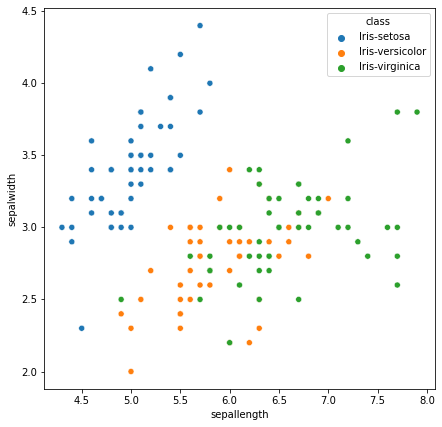

In [6]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y="sepalwidth", hue="class")

<AxesSubplot:xlabel='petallength', ylabel='petalwidth'>

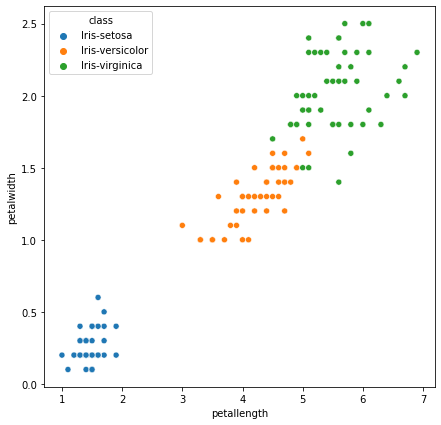

In [7]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="petallength", y="petalwidth", hue="class")

<AxesSubplot:>

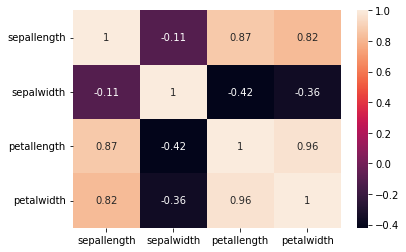

In [11]:
# badanie korelacji zm. niezależnej
sns.heatmap( df.iloc[: , :4].corr() , annot=True )

In [12]:
!pip install mlxtend
!pip install dtreeplt

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions
from dtreeplt import dtreeplt

In [26]:
#X = df[ ["sepallength","sepalwidth"] ]
X = df[ ["petallength","petalwidth"] ]

y = df.class_value

model = DecisionTreeClassifier(max_depth=11, random_state=0)
model.fit(X,y)

DecisionTreeClassifier(max_depth=11, random_state=0)

/Users/marian/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<AxesSubplot:>

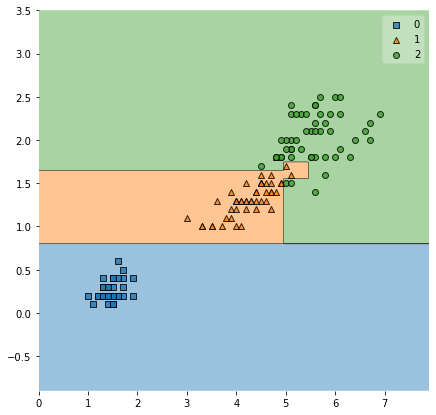

In [27]:
plt.figure(figsize=(7,7))
plot_decision_regions(X.values, y.values, model)

/Users/marian/opt/anaconda3/lib/python3.9/site-packages/dtreeplt/dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


<Figure size 792x576 with 0 Axes>

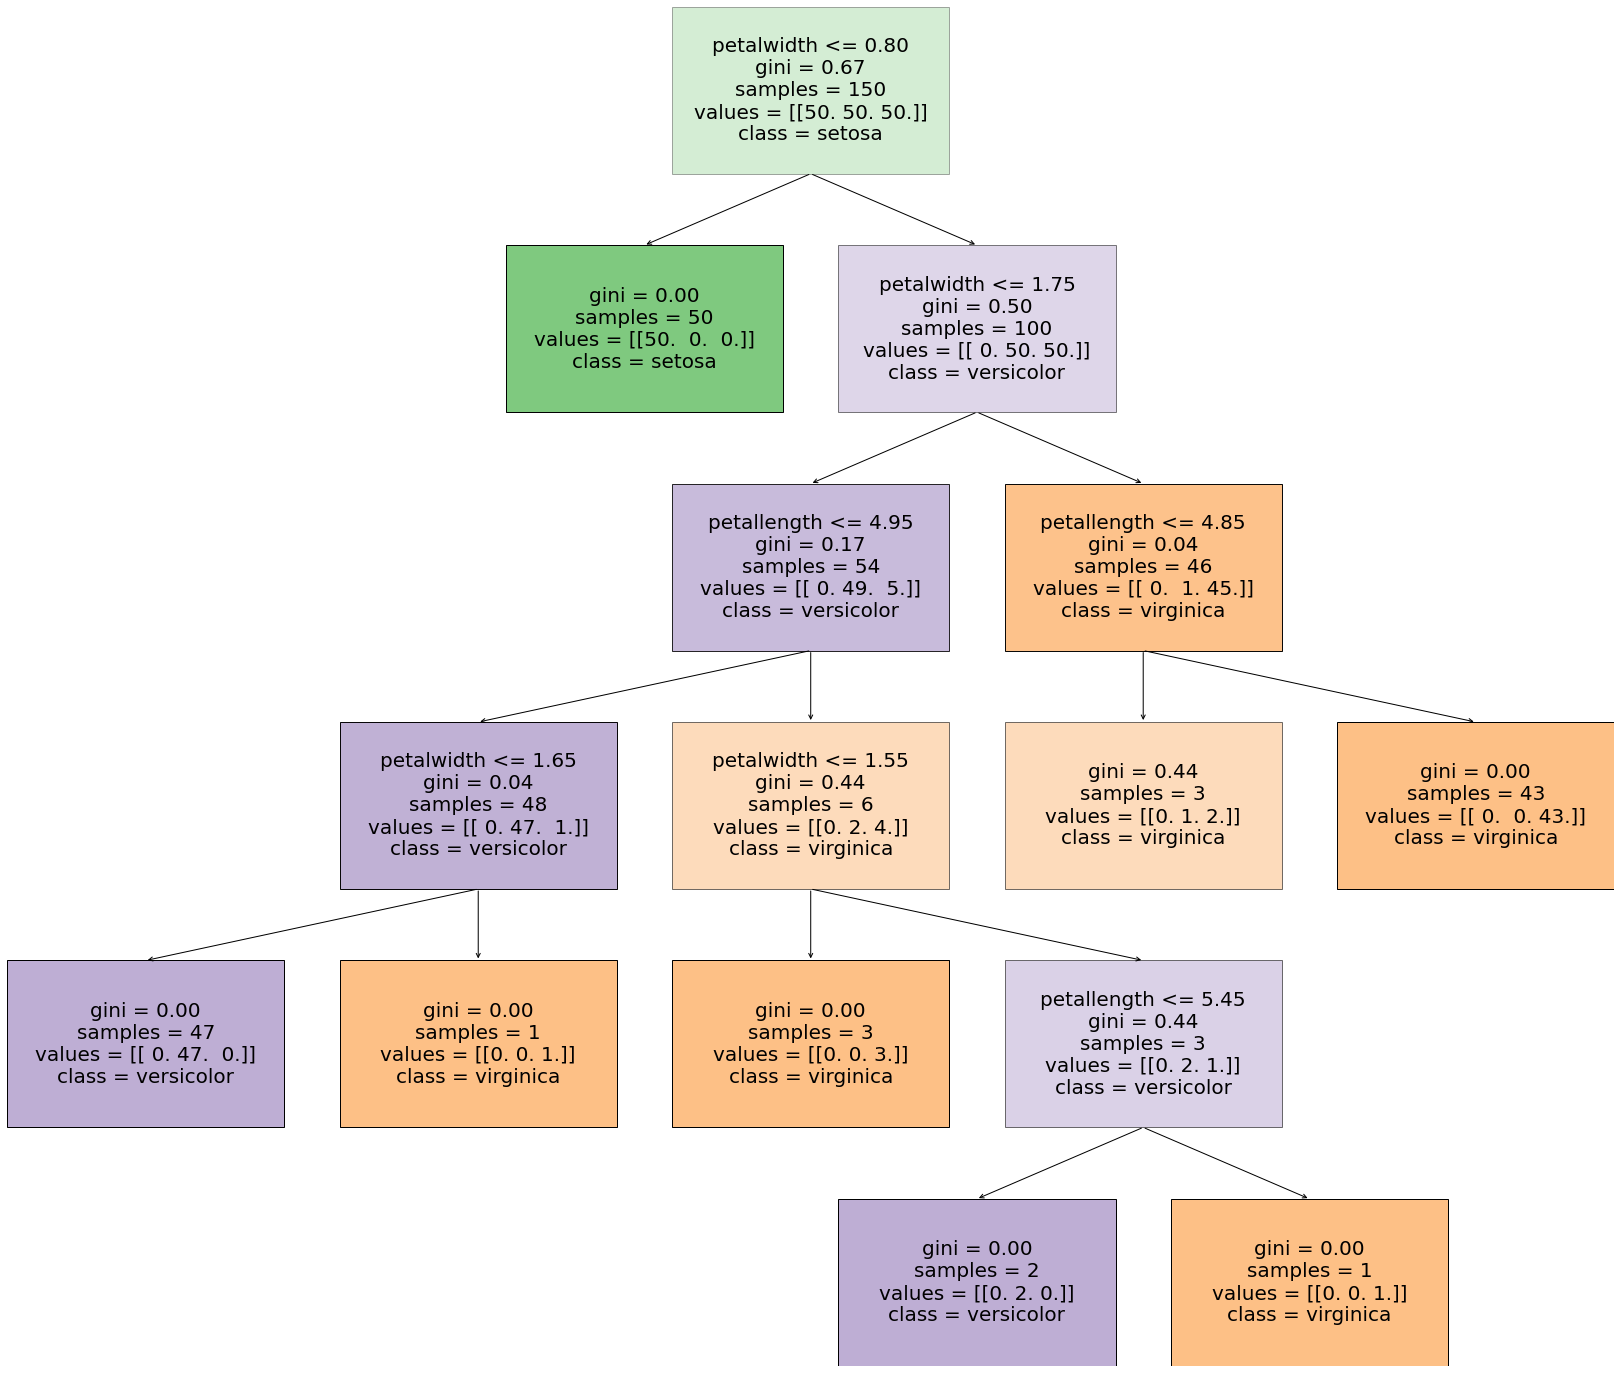

In [28]:
plt.figure(figsize=(11,8))
dtreeplt(model, feature_names=X.columns, target_names=["setosa","versicolor","virginica"]).view();

In [29]:
X = df.iloc[ : , :4]
y = df.class_value

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [30]:
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [31]:
y_pred = model.predict(X_test)
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1,2
0,11,0,0
1,0,13,0
2,0,0,6


/Users/marian/opt/anaconda3/lib/python3.9/site-packages/dtreeplt/dtreeplt.py:256: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(s='', xy=(dx, dy), xytext=(x, y),


<Figure size 792x576 with 0 Axes>

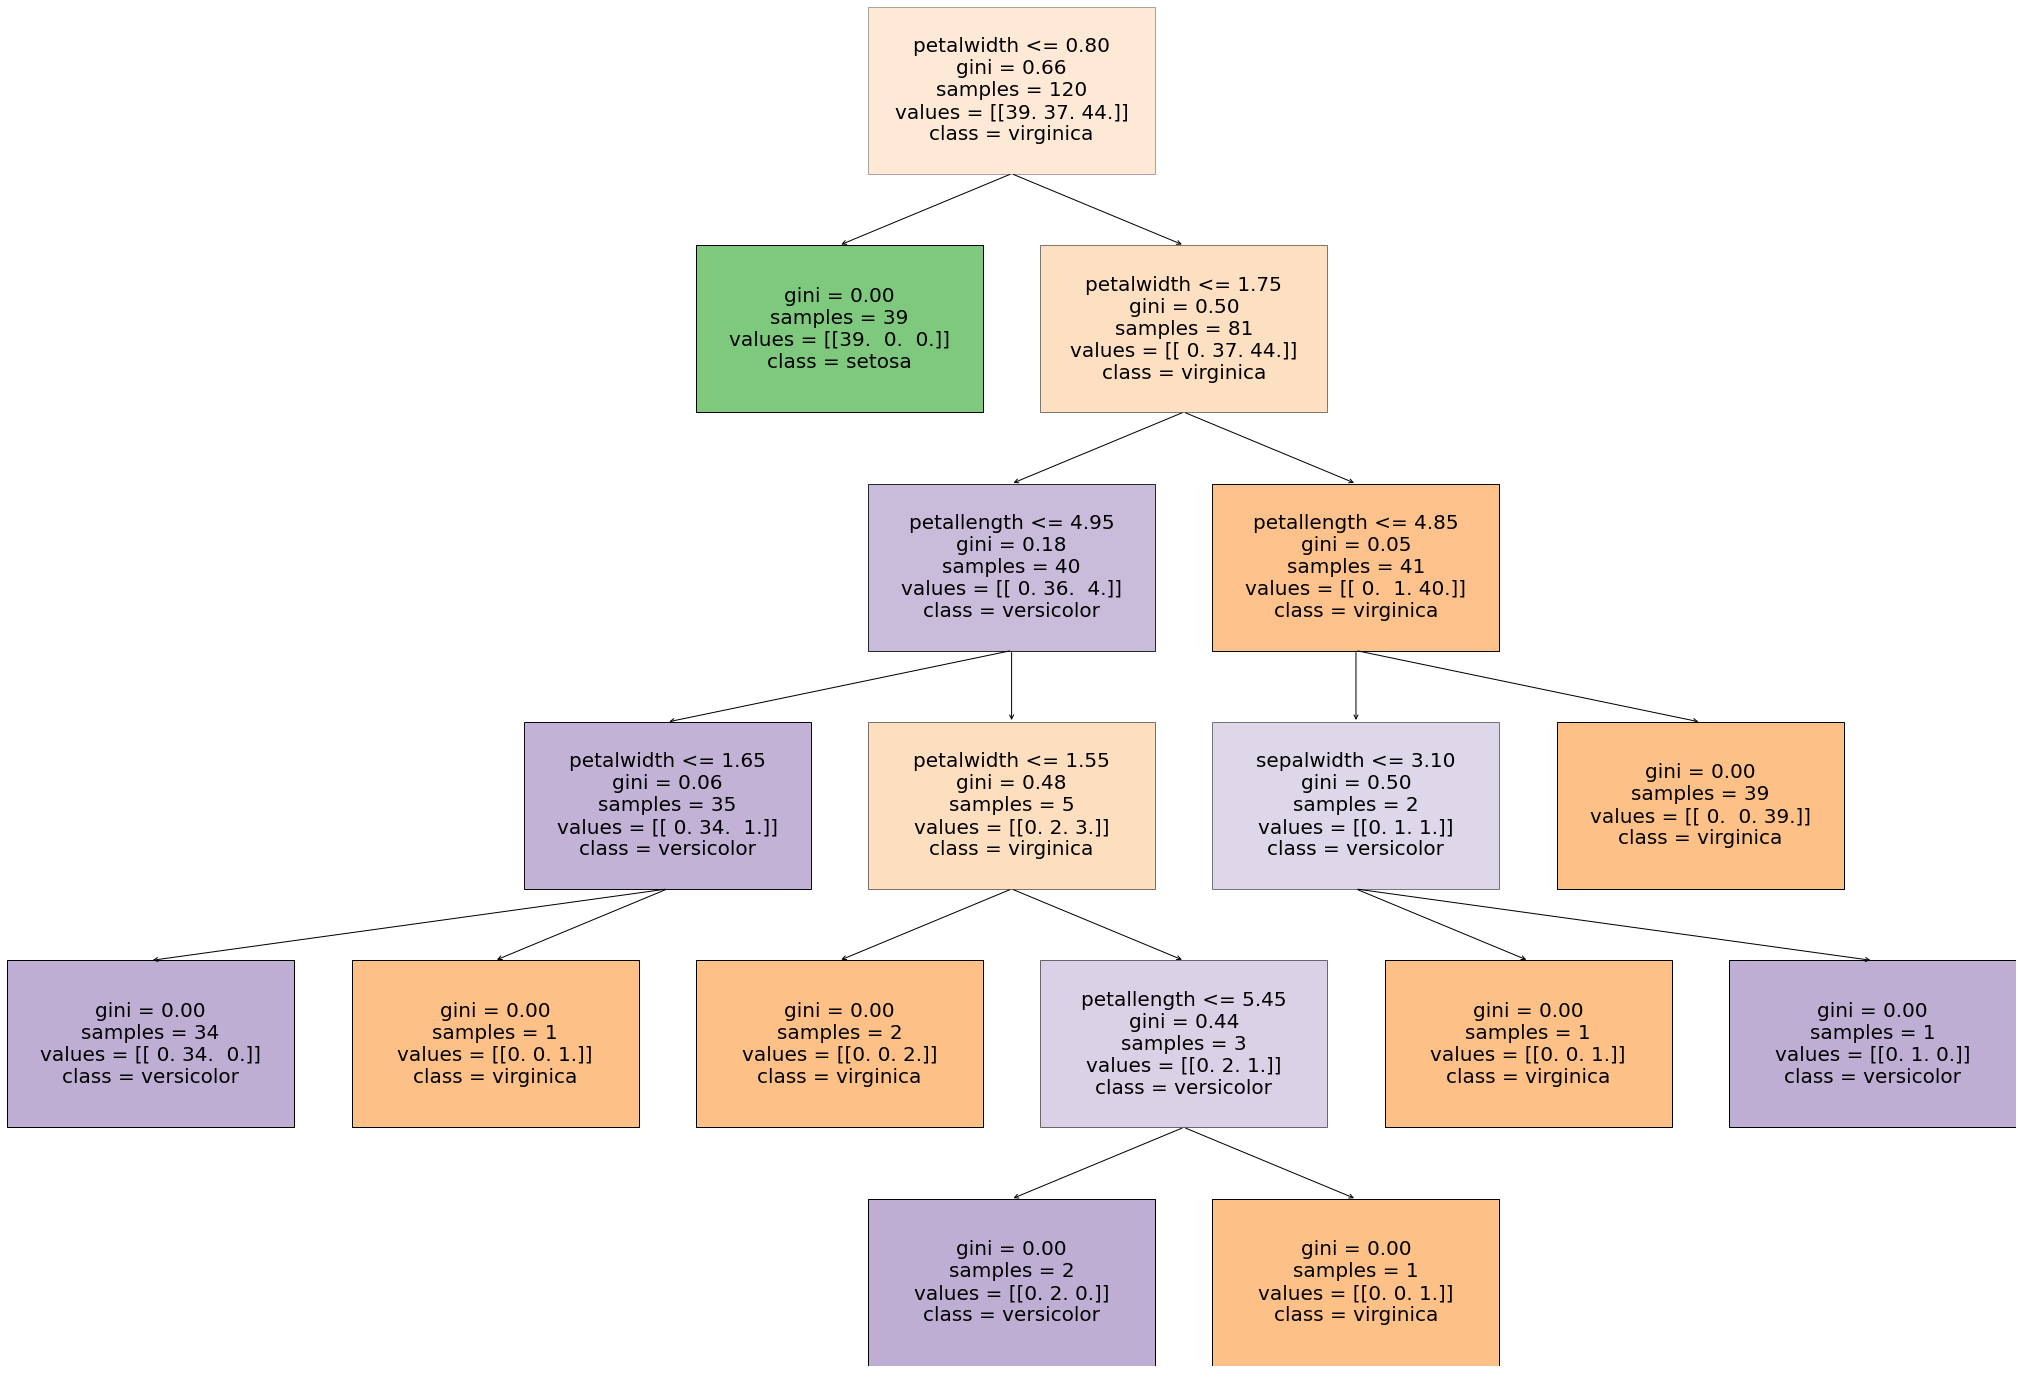

In [32]:
plt.figure(figsize=(11,8))
dtreeplt(model, feature_names=X.columns, target_names=["setosa","versicolor","virginica"]).view();

In [35]:
pd.DataFrame( model.feature_importances_ , index=X.columns)

,0
sepallength,0.000000
sepalwidth,0.012534
petallength,0.064446
petalwidth,0.923020


In [36]:
# porównanie z regresją logistyczną
df = pd.read_csv("cukrzyca.csv")

X = df.iloc[ : , :-1 ]
y = df.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = DecisionTreeClassifier(max_depth=8, random_state=0)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

y_pred = model.predict(X_test)
pd.DataFrame( confusion_matrix(y_test, y_pred) )

0.8571428571428571


,0,1
0,181,32
1,12,83


In [37]:
12 / (12+83)

0.12631578947368421